In [283]:
import pandas as pd
import matplotlib.pyplot as plt

In [284]:
df=pd.read_csv("/home/jackdaniel/Documents/learnig skill/keras/Salary_Data.csv")

In [285]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [286]:
x=df["YearsExperience"].values.reshape(30,1)
y=df["Salary"].values.reshape(30,1)

## Normalization

In [287]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [288]:
x=sc.fit_transform(x)
y=sc.fit_transform(y)

## Train test split

In [289]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Keras

In [290]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [291]:
model=Sequential()

In [292]:
model.add(Dense(1,input_dim=1,activation="linear"))
model.add(Dense(1,activation="linear"))

## compile the model

In [293]:
model.compile(optimizer="adam",
    loss="mse",
    metrics=["mae"])

## Train the model

In [294]:
model.fit(x_train,y_train,batch_size=8,epochs=200,shuffle=False)

Epoch 1/200
21/21 [==============================] - 0s 16ms/step - loss: 0.2909 - mae: 0.4397
Epoch 2/200
21/21 [==============================] - 0s 673us/step - loss: 0.2844 - mae: 0.4350
Epoch 3/200
21/21 [==============================] - 0s 996us/step - loss: 0.2779 - mae: 0.4303
Epoch 4/200
21/21 [==============================] - 0s 932us/step - loss: 0.2715 - mae: 0.4257
Epoch 5/200
21/21 [==============================] - 0s 537us/step - loss: 0.2651 - mae: 0.4210
Epoch 6/200
21/21 [==============================] - 0s 679us/step - loss: 0.2589 - mae: 0.4163
Epoch 7/200
21/21 [==============================] - 0s 577us/step - loss: 0.2528 - mae: 0.4116
Epoch 8/200
21/21 [==============================] - 0s 578us/step - loss: 0.2468 - mae: 0.4070
Epoch 9/200
21/21 [==============================] - 0s 565us/step - loss: 0.2410 - mae: 0.4024
Epoch 10/200
21/21 [==============================] - 0s 628us/step - loss: 0.2354 - mae: 0.3978
Epoch 11/200
21/21 [====================

21/21 [==============================] - 0s 837us/step - loss: 0.0532 - mae: 0.1977
Epoch 168/200
21/21 [==============================] - 0s 919us/step - loss: 0.0532 - mae: 0.1976
Epoch 169/200
21/21 [==============================] - 0s 646us/step - loss: 0.0532 - mae: 0.1976
Epoch 170/200
21/21 [==============================] - 0s 688us/step - loss: 0.0532 - mae: 0.1975
Epoch 171/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0532 - mae: 0.1975
Epoch 172/200
21/21 [==============================] - 0s 693us/step - loss: 0.0531 - mae: 0.1974
Epoch 173/200
21/21 [==============================] - 0s 671us/step - loss: 0.0531 - mae: 0.1974
Epoch 174/200
21/21 [==============================] - 0s 793us/step - loss: 0.0531 - mae: 0.1973
Epoch 175/200
21/21 [==============================] - 0s 703us/step - loss: 0.0531 - mae: 0.1973
Epoch 176/200
21/21 [==============================] - 0s 870us/step - loss: 0.0531 - mae: 0.1972
Epoch 177/200
21/21 [===============

## Evaluate

In [295]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

9/9 [==============================] - 0s 14ms/step


In [296]:
loss_and_metrics

[0.020129956305027008, 0.11762503534555435]

## Prediction

In [297]:
prd = model.predict(x_test, batch_size=128)

In [298]:
prd

array([[-0.13961102],
       [-1.1570668 ],
       [-0.8413047 ],
       [ 1.8251314 ],
       [-0.42028847],
       [ 0.526998  ],
       [ 0.91292936],
       [ 1.1936069 ],
       [ 0.632252  ]], dtype=float32)

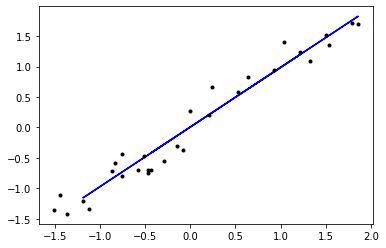

In [299]:
plt.plot(x_test, prd, 'b', x  , y, 'k.')
plt.show()

In [300]:
from sklearn.metrics import r2_score

In [301]:
r2=r2_score(y_test,prd)

In [302]:
r2*100

97.80846488872307